# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | latakia
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | tumaco
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | mossel bay
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | edinburgh of the seven seas
Processing Record 23 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,8.22,79,6,3.74,ZA,1715484974
1,ushuaia,-54.8000,-68.3000,3.81,56,40,7.72,AR,1715484974
2,anadyr,64.7500,177.4833,-0.72,74,100,2.00,RU,1715484975
3,bilibino,68.0546,166.4372,2.99,76,75,1.19,RU,1715484975
4,enewetak,11.3474,162.3373,27.70,81,94,8.14,MH,1715484975


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,8.22,79,6,3.74,ZA,1715484974
1,ushuaia,-54.8000,-68.3000,3.81,56,40,7.72,AR,1715484974
2,anadyr,64.7500,177.4833,-0.72,74,100,2.00,RU,1715484975
3,bilibino,68.0546,166.4372,2.99,76,75,1.19,RU,1715484975
4,enewetak,11.3474,162.3373,27.70,81,94,8.14,MH,1715484975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

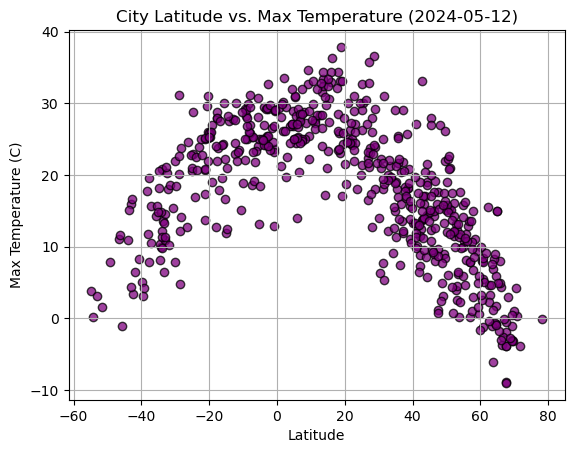

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

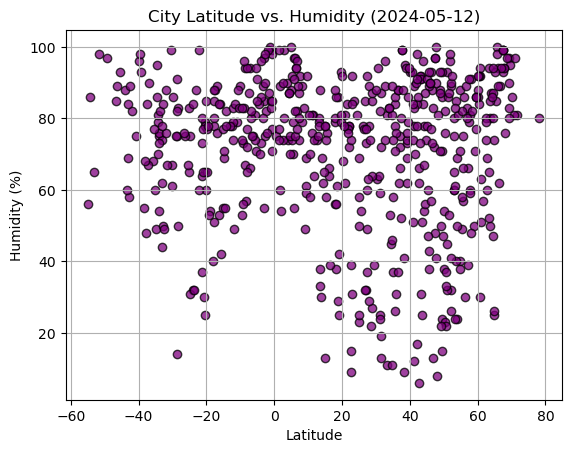

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

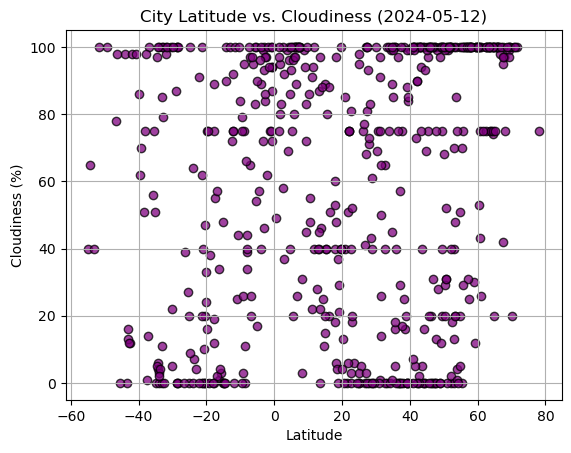

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

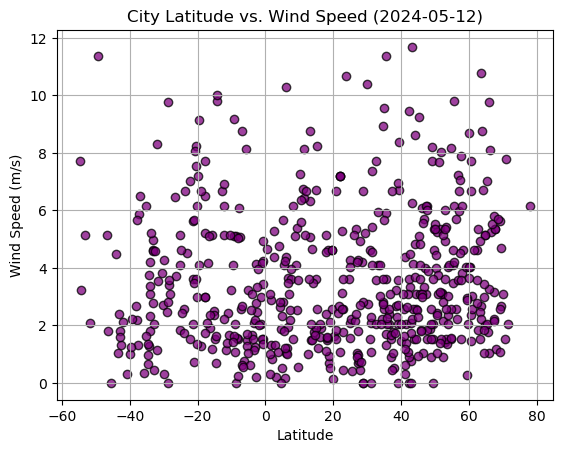

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",alpha=0.75,color="#7F017F",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_func(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    return rvalue, regress_values, line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,-0.72,74,100,2.00,RU,1715484975
3,bilibino,68.0546,166.4372,2.99,76,75,1.19,RU,1715484975
4,enewetak,11.3474,162.3373,27.70,81,94,8.14,MH,1715484975
5,dudinka,69.4058,86.1778,-2.96,97,99,2.68,RU,1715484975
6,latakia,35.5148,35.7768,18.10,78,16,5.92,SY,1715484975


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,8.22,79,6,3.74,ZA,1715484974
1,ushuaia,-54.8000,-68.3000,3.81,56,40,7.72,AR,1715484974
7,margaret river,-33.9500,115.0667,20.85,54,100,1.82,AU,1715484840
9,port-aux-francais,-49.3500,70.2167,7.88,97,100,11.36,TF,1715484400
10,adamstown,-25.0660,-130.1015,20.55,65,0,4.09,PN,1715484973


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8351482891806961


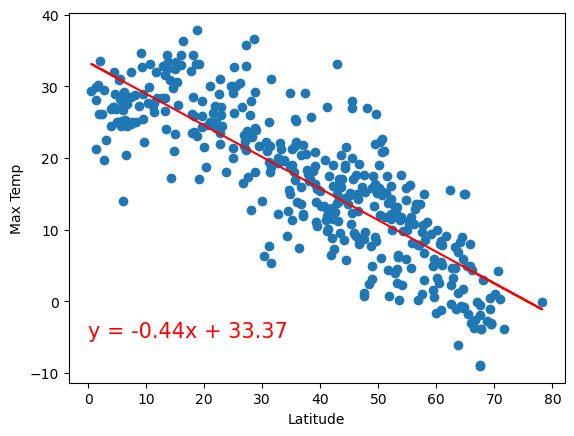

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7567999673009661


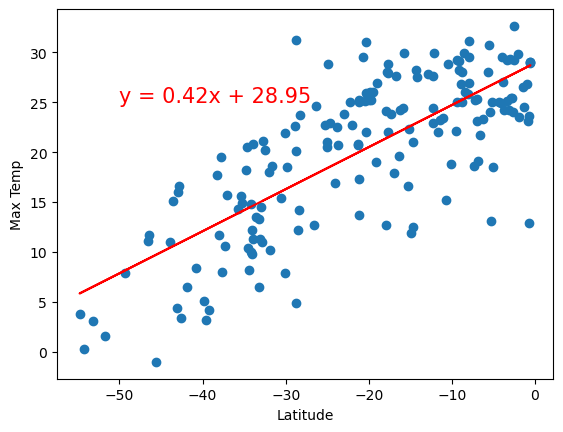

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** <br/><br/>
**Northern Hemisphere:**
- **Direction:** The negative correlation coefficient (-0.835) indicates a strong negative linear relationship between latitude and maximum temperature in the Northern Hemisphere. As latitude increases (moving towards the North Pole), maximum temperature decreases.
- **Strength:** The correlation coefficient being close to -1 suggests a strong linear relationship, indicating that changes in latitude are strongly associated with changes in maximum temperature.
- **Linearity**: The equation of the regression line (y = -0.44x + 33.37) indicates that the relationship follows a linear pattern. As latitude increases by one unit, maximum temperature decreases by 0.44 units.

**Northern Hemisphere:**
- **Direction:** The positive correlation coefficient (0.757) indicates a strong positive linear relationship between latitude and maximum temperature in the Southern Hemisphere. As latitude increases (moving towards the equator), maximum temperature increases.- **Strength:** The correlation coefficient being close to 1 suggests a strong linear relationship, indicating that changes in latitude are strongly associated with changes in maximum temperature.
- **Linearity:** The equation of the regression line (y = 0.42x + 28.95) confirms that the relationship follows a linear pattern. As latitude increases by one unit, maximum temperature increases by 0.42 units.

**Interpretation:**

- **Northern Hemisphere:** The strong negative correlation between latitude and maximum temperature suggests that locations closer to the North Pole tend to have lower temperatures. This is in line with the expected pattern of temperature variation with latitude in the Northern Hemisphere.
- **Southern Hemisphere:** The strong positive correlation between latitude and maximum temperature suggests that locations closer to the equator tend to have higher temperatures. This aligns with the general trend of temperature variation with latitude in the Southern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.023434954447296128


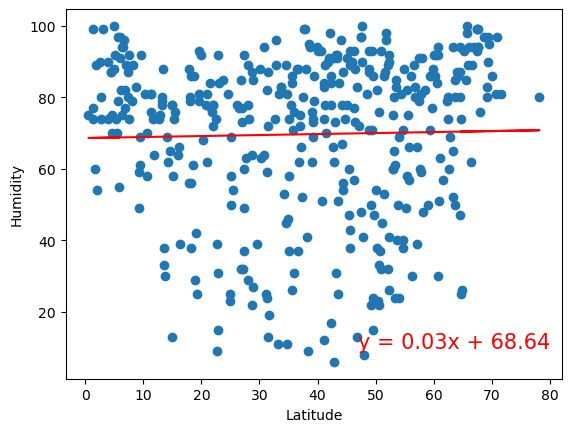

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.1323195848053794


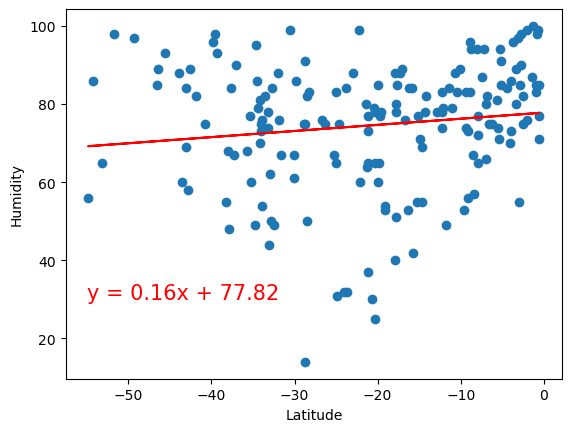

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 

**Northern Hemisphere:**

- **Direction:** There is a weak positive linear relationship between latitude and humidity in the Northern Hemisphere. As latitude increases, there is a slight increase in humidity, but the relationship is very weak.
- **Strength:** The correlation coefficient being close to 0 suggests a weak linear relationship, indicating that changes in latitude are minimally associated with changes in humidity.
- **Linearity:** The equation of the regression line suggests a very slight positive slope, indicating that as latitude increases by one unit, humidity increases by 0.03 units.

**Southern Hemisphere:**

- **Direction:** There is a weak positive linear relationship between latitude and humidity in the Southern Hemisphere. As latitude increases (moving towards the equator), there is a slight increase in humidity, but the relationship is very weak.
- **Strength:** The correlation coefficient being close to 0 suggests a weak linear relationship, indicating that changes in latitude are minimally associated with changes in humidity.
- **Linearity:** The equation of the regression line also suggests a very slight positive slope, indicating that as latitude increases by one unit, humidity increases by 0.16 units.

**Interpretation:**

- **Northern Hemisphere:** Latitude alone may not be a significant predictor of humidity levels in the Northern Hemisphere. Other factors may have a greater influence on humidity levels in this region.
- **Southern Hemisphere:** Similarly, latitude alone may not be a significant predictor of humidity levels in the Southern Hemisphere. Other factors may play a more dominant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14138560339318296


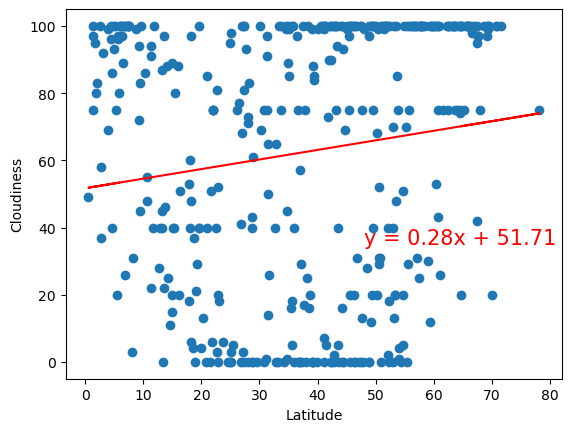

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.16730922937417525


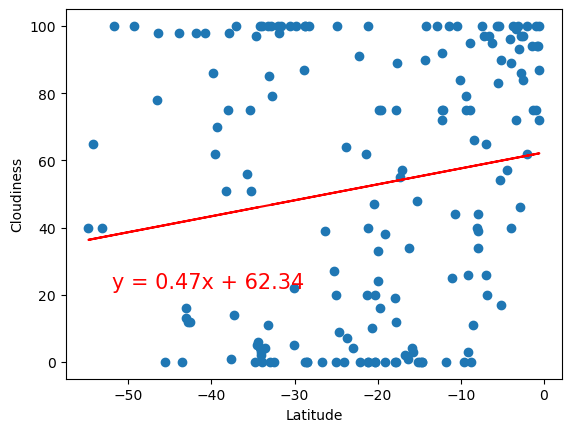

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:**

**Northern Hemisphere:**

- **Direction:** There is a positive linear relationship between latitude and cloudiness in the Northern Hemisphere. As latitude increases, there is a slight increase in cloudiness, but the relationship is weak.
- **Strength:** The correlation coefficient being close to 0.141 suggests a weak positive linear relationship, indicating that changes in latitude are minimally associated with changes in cloudiness.
- **Linearity:** The equation of the regression line suggests a positive slope, indicating that as latitude increases by one unit, cloudiness increases by 0.28 units.

**Southern Hemisphere:**

- **Direction:** There is a positive linear relationship between latitude and cloudiness in the Southern Hemisphere. As latitude increases (moving towards the equator), there is a slight increase in cloudiness, but the relationship is weak.
- **Strength:** The correlation coefficient being close to 0.167 suggests a weak positive linear relationship, indicating that changes in latitude are minimally associated with changes in cloudiness.
- **Linearity:** The equation of the regression line also suggests a positive slope, indicating that as latitude increases by one unit, cloudiness increases by 0.47 units.

**Interpretation:**

- **Northern Hemisphere:** Latitude alone may not be a significant predictor of cloudiness levels in the Northern Hemisphere. Other factors may have a greater influence on cloudiness levels in this region.
- **Southern Hemisphere:** Similarly, latitude alone may not be a significant predictor of cloudiness levels in the Southern Hemisphere. Other factors may play a more dominant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13644533567890077


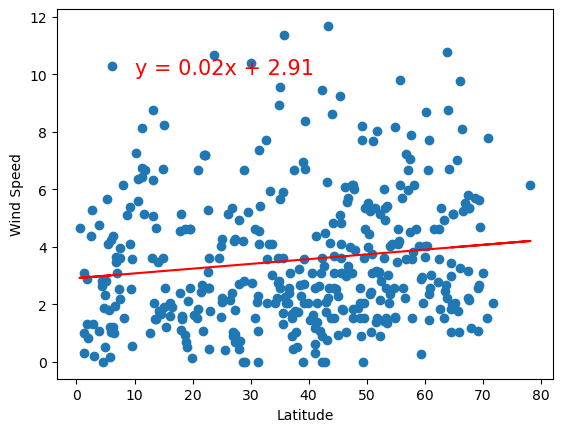

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.06156905413171978


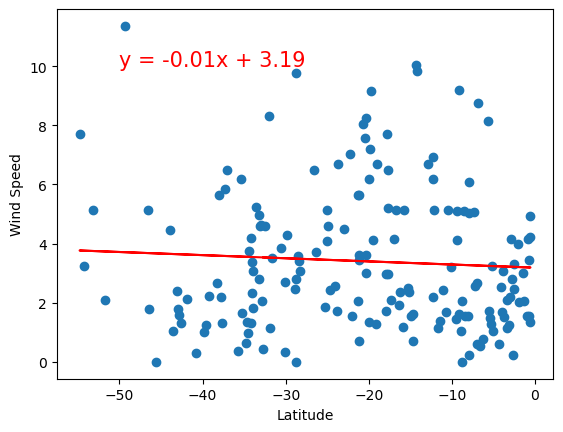

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
rvalue,regress_values, line_eq = linear_regression_func(x_values,y_values)
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

**Northern Hemisphere:**

- **Direction:** There is a weak positive linear relationship between latitude and wind speed in the Northern Hemisphere. As latitude increases, there is a slight increase in wind speed, but the relationship is weak.
- **Strength:** The correlation coefficient being close to 0.136 suggests a weak positive linear relationship, indicating that changes in latitude are minimally associated with changes in wind speed.
- **Linearity:** The equation of the regression line suggests a positive slope, indicating that as latitude increases by one unit, wind speed increases by 0.02 units.

**Southern Hemisphere:**

- **Direction:** There is a weak negative linear relationship between latitude and wind speed in the Southern Hemisphere. As latitude increases (moving towards the equator), there is a slight decrease in wind speed, but the relationship is weak.- **Strength:** The correlation coefficient being close to -0.062 suggests a weak negative linear relationship, indicating that changes in latitude are minimally associated with changes in wind speed.
- **Linearity:** The equation of the regression line suggests a negative slope, indicating that as latitude increases by one unit, wind speed decreases by 0.01 units.

**Interpretation:**

- **Northern Hemisphere:** Latitude alone may not be a significant predictor of wind speed levels in the Northern Hemisphere. Other factors may have a greater influence on wind speed levels in this region.
- **Southern Hemisphere:** Similarly, latitude alone may not be a significant predictor of wind speed levels in the Southern Hemisphere. Other factors may play a more dominant role in determining wind speed levels.
